In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/haram4th/ablearn/main/galaxy.csv')
data.head()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1


* BuyItNow : 바로 구매 할 수 있는지의 여부(즉시 구매)
* startprice : 경매의 시작 가격
* carrier : 통신사
* color : 기기 색상
* productline : 모델명
* noDescription : 판매자가 설명을 썼는지 안썼는지
* charCountDescriptio : 설명이 얼마나 긴지
* upperCaseDescription : 몇 문장인지
* sold : 팔렸는지 안팔렸는지 (우리가 알고자하는 종속변수)

# 전처리

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   BuyItNow              1485 non-null   int64
 1   startprice            1485 non-null   int64
 2   color                 1485 non-null   int64
 3   productline           1485 non-null   int64
 4   noDescription         1485 non-null   int64
 5   upperCaseDescription  1485 non-null   int64
 6   sold                  1485 non-null   int64
dtypes: int64(7)
memory usage: 81.3 KB


In [142]:
data.describe()

,BuyItNow,startprice,color,productline,noDescription,upperCaseDescription,sold
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,0.449158,3.896970,5.200000,3.407407,0.423569,0.400673,0.461953
std,0.497576,3.395855,1.740124,2.550371,0.494290,0.490200,0.498718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,6.000000,4.000000,0.000000,0.000000,0.000000
75%,1.000000,6.000000,6.000000,5.000000,1.000000,1.000000,1.000000
max,1.000000,19.000000,7.000000,7.000000,1.000000,1.000000,1.000000


In [5]:
data.isna()

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,False,False,True,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False
2,False,False,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1480,False,False,False,True,False,False,False,False,False
1481,False,False,True,False,False,False,False,False,False
1482,False,False,True,False,False,False,False,False,False
1483,False,False,True,False,False,False,False,False,False


In [6]:
data.isna().sum()

BuyItNow                   0
startprice                 0
carrier                 1169
color                    593
productline                0
noDescription              0
charCountDescription       0
upperCaseDescription       0
sold                       0
dtype: int64

In [7]:
data

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,NaN,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,NaN,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,NaN,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,NaN,Midnight Black,Galaxy_S7,no description,92,2,1


# ------------------------------------------------------------------------

In [8]:
data[['sold', 'BuyItNow']].groupby('BuyItNow').value_counts(sort = False)

BuyItNow  sold
0         0       639
          1       179
1         0       160
          1       507
Name: count, dtype: int64

<Axes: xlabel='BuyItNow,sold'>

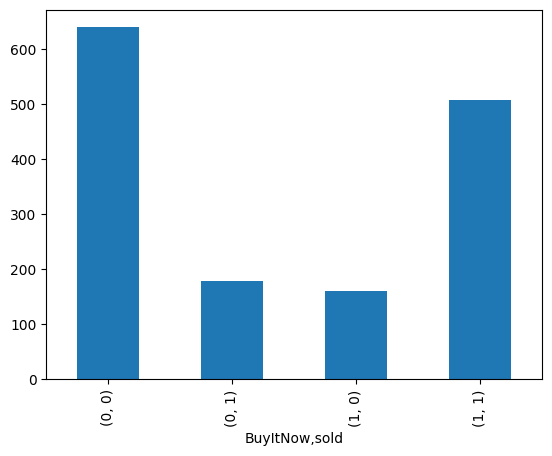

In [9]:
data[['sold', 'BuyItNow']].groupby('BuyItNow').value_counts(sort = False).plot(kind = 'bar')

In [91]:
data['startprice_binned'] = pd.cut(data['startprice'], bins=range(0, int(data['startprice'].max()) + 50, 50)).value_counts()


<Axes: xlabel='startprice_binned,sold'>

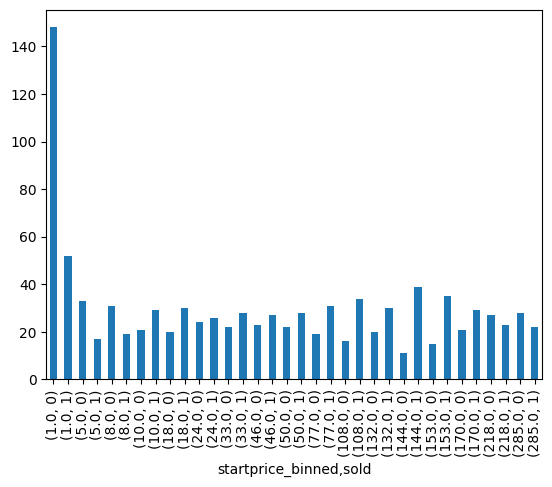

In [94]:
data[['sold', 'startprice_binned']].groupby('startprice_binned').value_counts(sort=False).plot(kind='bar')

In [95]:
data['startprice_binned'].value_counts()

startprice_binned
1.0      200
285.0     50
218.0     50
170.0     50
132.0     50
144.0     50
108.0     50
77.0      50
153.0     50
50.0      50
46.0      50
24.0      50
33.0      50
18.0      50
10.0      50
8.0       50
5.0       50
Name: count, dtype: int64

In [81]:
data['startprice'].value_counts()

startprice
0.99      114
100.00     43
50.00      33
150.00     32
200.00     29
         ... 
144.50      1
224.99      1
54.99       1
57.50       1
91.00       1
Name: count, Length: 485, dtype: int64

C:\Users\5-04\AppData\Local\Temp\ipykernel_11620\1815980226.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['startprice_binned', 'sold']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))


<Axes: xlabel='startprice_binned'>

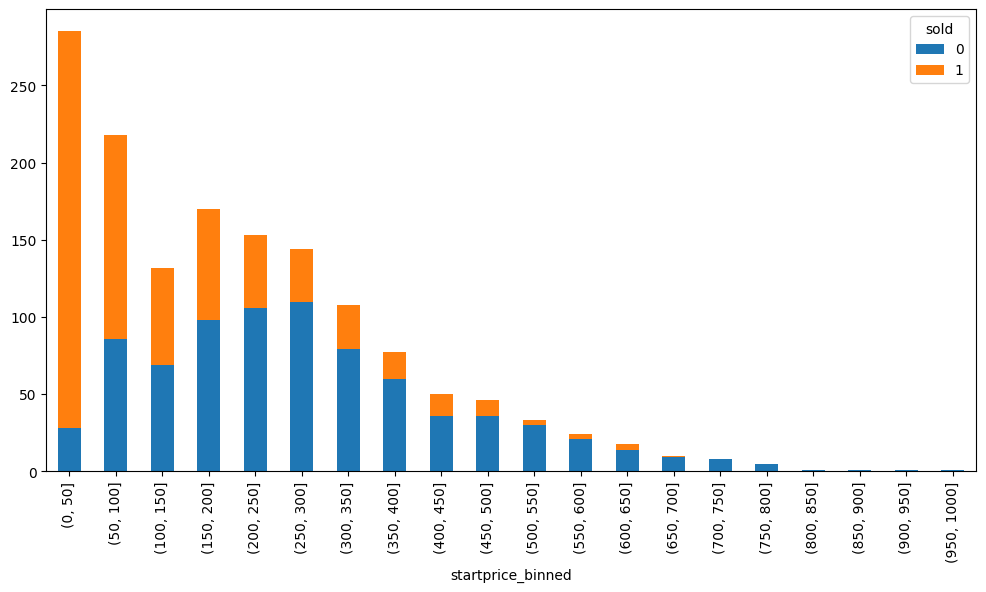

In [100]:
data['startprice_binned'] = pd.cut(data['startprice'], bins=range(0, int(data['startprice'].max()) + 50, 50))
data.groupby(['startprice_binned', 'sold']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 6))

* 구간화 (pd.cut): startprice 값을 50 단위로 구간을 나눕니다. 예를 들어, 0-50, 50-100, 100-150 등으로 나눕니다.
* 그룹화 (groupby): 이렇게 나눈 구간에 대해 sold 값이 0 또는 1인 경우가 얼마나 있는지를 그룹화하여 계산합니다.
* 그래프 출력 (plot): 계산된 결과를 바 그래프로 나타내며, 같은 구간 내에서 sold가 0인 경우와 1인 경우가 쌓여서 표시됩니다.
* .size(): 각 그룹에 속하는 데이터의 개수를 세어줍니다. 특정 구간의 startprice에 대해 sold가 0 또는 1인 경우가 각각 몇 개 있는지를 계산
* .unstack(): 이 부분은 그룹화된 결과를 2차원 형태로 변환합니다. sold 값이 0과 1인 경우가 각각 별도의 열
<br><br>
* .plot(kind='bar', stacked=True, figsize=(12, 6))
* stacked=True: 이 옵션은 막대를 누적 형태
* figsize=(12, 6): 그래프의 크기를 설정합니다. 가로 12인치, 세로 6인치

In [ ]:
data['startprice']

In [109]:
def startprice_num(x):
    # 0-50
    if x < 50:  
        return 0
    # 50-100
    elif x < 100:
        return 1
    # 100-150    
    elif x < 150:
        return 2
    # 150-200
    elif x < 200:
        return 3
    # 200-250
    elif x < 250:
        return 4
    # 250-300
    elif x < 300:
        return 5
    # 300-350
    elif x < 350:
        return 6
    # 350-400
    elif x < 400:
        return 7
    # 400-450
    elif x < 450:
        return 8
    # 450-500
    elif x < 500:
        return 9
    # 500-550
    elif x < 550:
        return 10
    # 550-600
    elif x < 600:
        return 11
    # 600-650
    elif x < 650:
        return 12
    # 650-700
    elif x < 700:
        return 13
    # 700-750
    elif x < 750:
        return 14
    # 750-800
    elif x < 800:
        return 15
    # 800-850
    elif x < 850:
        return 16
    # 850-900
    elif x < 900:
        return 17
    # 900-950
    elif x < 950:
        return 18
    # 950-1000
    elif x < 1000:
        return 19
    # 1000+
    else:
        return 20

# 예시로 적용
data['startprice'] = data['startprice'].apply(startprice_num)


TypeError: '<' not supported between instances of 'str' and 'int'

In [87]:
data['startprice'].nunique()

485

In [88]:
data['startprice'].min()

np.float64(0.01)

In [96]:
data['startprice'].max()

np.float64(999.0)

In [89]:
data['startprice'].mean()

np.float64(216.84416161616159)

In [90]:
data['startprice'].mode()

0    0.99
Name: startprice, dtype: float64

In [137]:
data[['sold', 'startprice']].groupby('startprice').value_counts(sort = False)

startprice  sold
0           0        27
            1       225
1           0        72
            1       136
2           0        73
            1        70
3           0        95
            1        78
4           0       105
            1        48
5           0       110
            1        37
6           0        77
            1        35
7           0        66
            1        18
8           0        43
            1        15
9           0        32
            1        10
10          0        30
            1         5
11          0        27
            1         4
12          0        15
            1         3
13          0         8
            1         2
14          0         9
15          0         5
16          0         2
18          0         2
19          0         1
Name: count, dtype: int64

<Axes: xlabel='startprice,sold'>

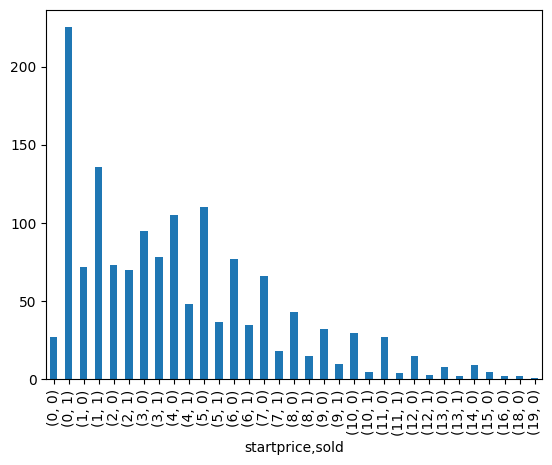

In [138]:
data[['sold', 'startprice']].groupby('startprice').value_counts(sort = False).plot(kind = 'bar')

<Axes: ylabel='Frequency'>

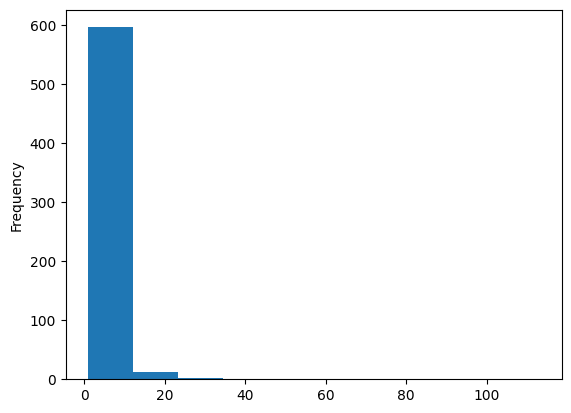

In [11]:
data[['sold', 'startprice']].groupby('startprice').value_counts(sort = False).plot(kind = 'hist')

<Axes: ylabel='Frequency'>

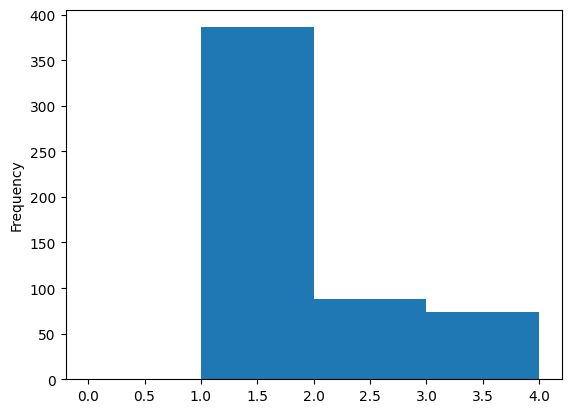

In [80]:
data[['sold', 'startprice']].groupby('startprice').value_counts(sort = False).plot(kind = 'hist',bins=range(0, 5))

<Axes: ylabel='Frequency'>

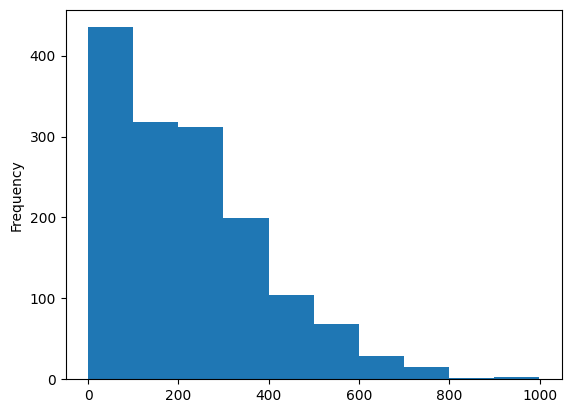

In [12]:
data['startprice'].plot(kind = 'hist')

In [13]:
# 통신사
data[['sold', 'carrier']].groupby('carrier').value_counts(sort = False)

carrier          sold
AT&T             0       101
                 1        76
Sprint/T-Mobile  0        28
                 1        24
Verizon          0        41
                 1        46
Name: count, dtype: int64

<Axes: xlabel='carrier,sold'>

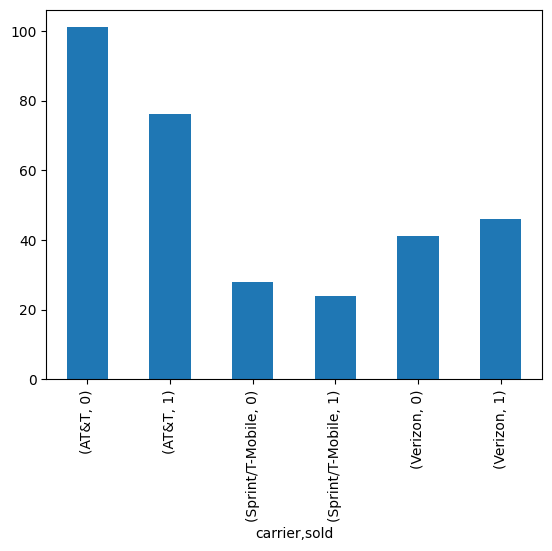

In [14]:
data[['sold', 'carrier']].groupby('carrier').value_counts(sort = False).plot(kind = 'bar')

In [15]:
data[['sold', 'color']].groupby('color').value_counts(sort = False)

color           sold
Aura Black      0        13
                1         6
Black           0        22
                1        16
Gold            0        34
                1        18
Midnight Black  0       121
                1       153
Prism Black     0         1
Space Gray      0        99
                1        81
White           0       185
                1       143
Name: count, dtype: int64

<Axes: xlabel='color,sold'>

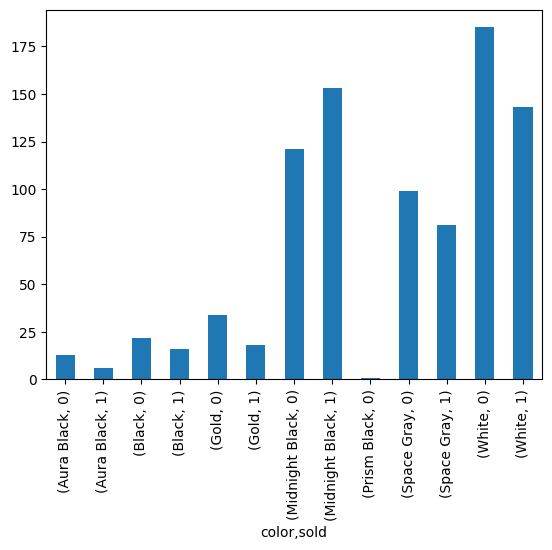

In [16]:
data[['sold', 'color']].groupby('color').value_counts(sort = False).plot(kind = 'bar')

In [17]:
data[['sold', 'productline']].groupby('productline').value_counts(sort = False)

productline    sold
Galaxy_Note10  0       202
               1       149
Galaxy_Note8   0        73
               1        80
Galaxy_Note9   0        58
               1        49
Galaxy_S10     0         4
               1         4
Galaxy_S7      0       102
               1       125
Galaxy_S8      0       145
               1       132
Galaxy_S9      0        93
               1        65
Unknown        0       122
               1        82
Name: count, dtype: int64

<Axes: xlabel='productline,sold'>

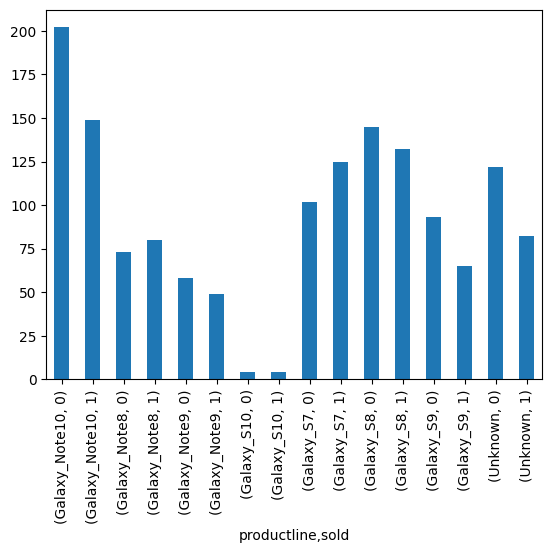

In [18]:
data[['sold', 'productline']].groupby('productline').value_counts(sort = False).plot(kind = 'bar')

In [19]:
data[['sold', 'noDescription']].groupby('noDescription').value_counts(sort = False)

noDescription         sold
contains description  0       443
                      1       413
no description        0       356
                      1       273
Name: count, dtype: int64

<Axes: xlabel='noDescription,sold'>

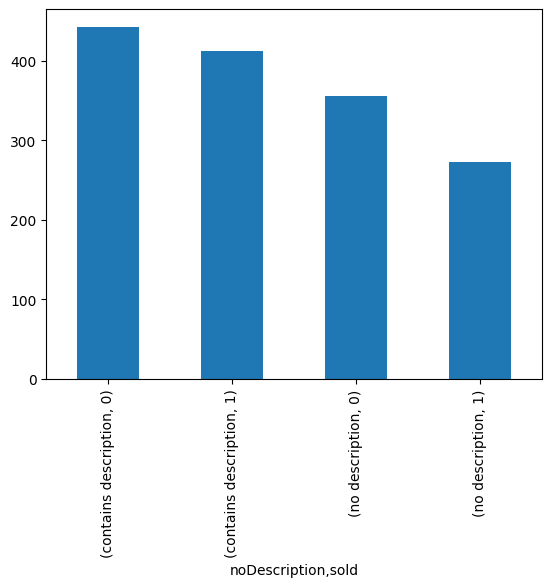

In [20]:
data[['sold', 'noDescription']].groupby('noDescription').value_counts(sort = False).plot(kind = 'bar')

In [21]:
data[['sold', 'charCountDescription']].groupby('charCountDescription').value_counts(sort = False)

charCountDescription  sold
0                     0       443
                      1       413
3                     0         1
4                     1         3
5                     0         1
                             ... 
106                   1         1
108                   0         1
                      1         1
109                   1         1
111                   1         1
Name: count, Length: 175, dtype: int64

<Axes: xlabel='charCountDescription,sold'>

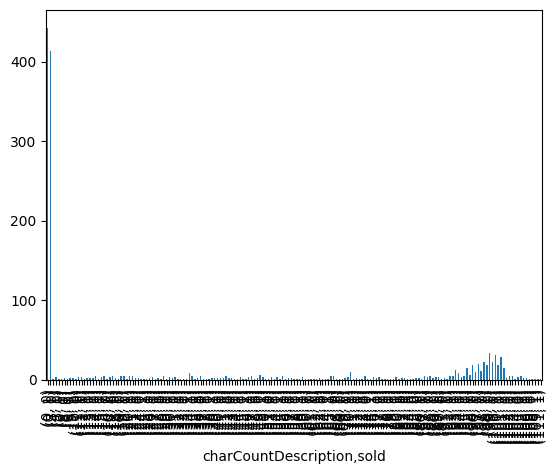

In [22]:
data[['sold', 'charCountDescription']].groupby('charCountDescription').value_counts(sort = False).plot(kind = 'bar')

<Axes: ylabel='Frequency'>

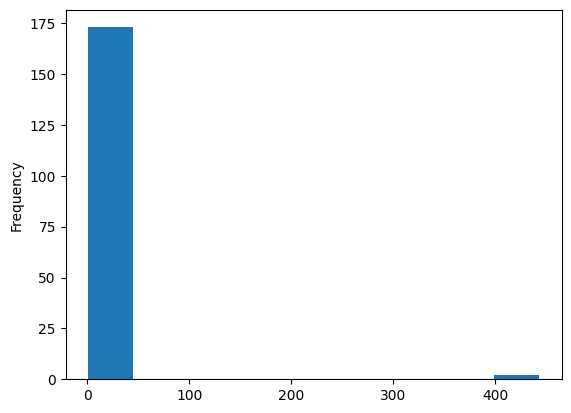

In [23]:
data[['sold', 'charCountDescription']].groupby('charCountDescription').value_counts(sort = False).plot(kind = 'hist')

<Axes: ylabel='Frequency'>

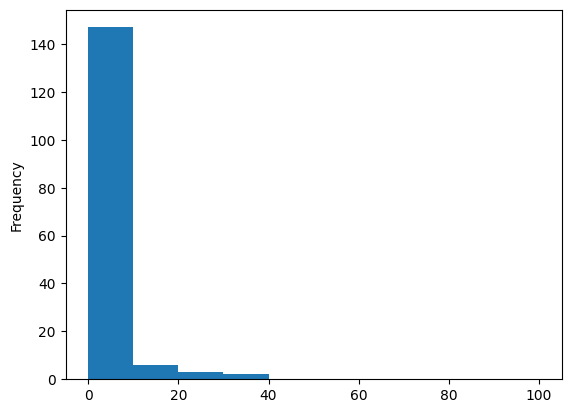

In [42]:
data[data['charCountDescription'] <= 100][['sold', 'charCountDescription']].groupby('charCountDescription').value_counts(sort=False).plot(kind='hist', bins=range(0, 101, 10))

<Axes: ylabel='Frequency'>

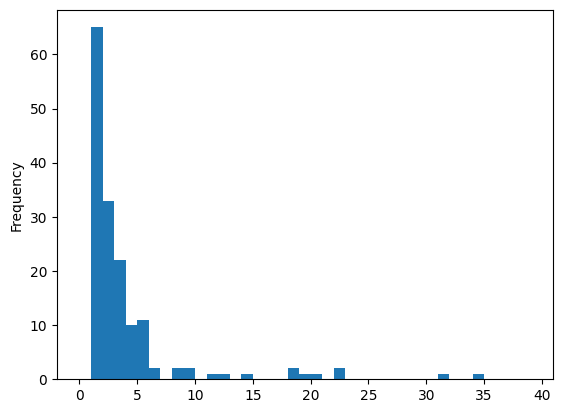

In [44]:
data[data['charCountDescription'] <= 100][['sold', 'charCountDescription']].groupby('charCountDescription').value_counts(sort=False).plot(kind='hist', bins=range(0, 40))

<Axes: xlabel='charCountDescription'>

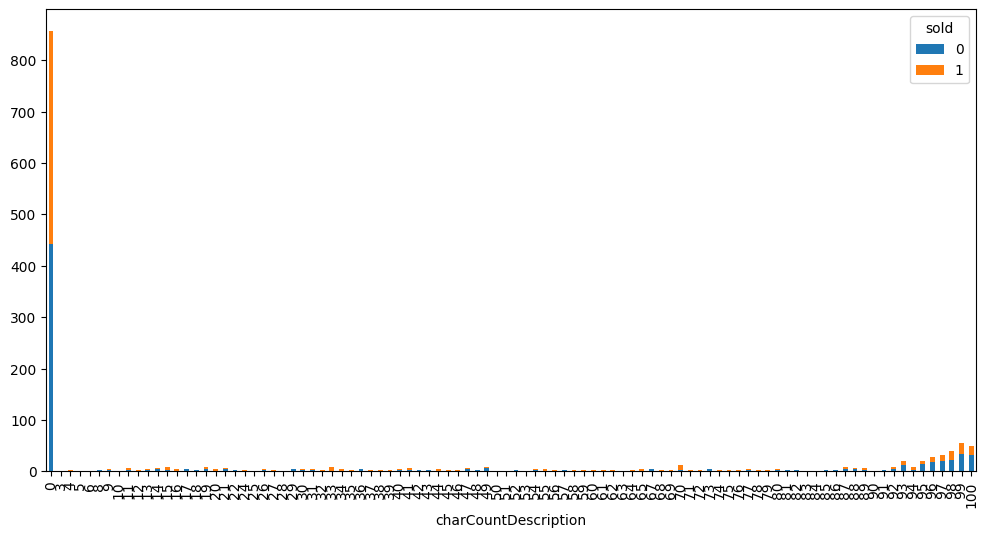

In [45]:
data[data['charCountDescription'] <= 100][['sold', 'charCountDescription']].groupby(['charCountDescription', 'sold']).size().unstack(fill_value=0).plot(kind='bar', stacked=True, figsize=(12, 6))

In [24]:
data[['sold', 'upperCaseDescription']].groupby('upperCaseDescription').value_counts(sort = False)

upperCaseDescription  sold
0                     0       456
                      1       434
1                     0        65
                      1        61
2                     0        71
                             ... 
76                    1         2
77                    0         1
78                    0         2
80                    0         3
81                    0         2
Name: count, Length: 66, dtype: int64

<Axes: xlabel='upperCaseDescription,sold'>

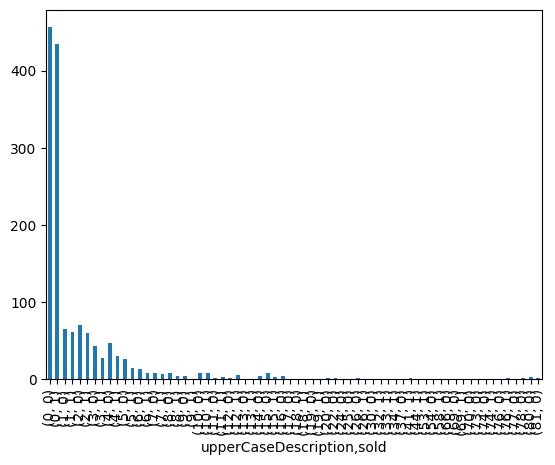

In [25]:
data[['sold', 'upperCaseDescription']].groupby('upperCaseDescription').value_counts(sort = False).plot(kind = 'bar')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               316 non-null    object 
 3   color                 892 non-null    object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


In [27]:
# 결측치 비율
data.isna().sum() / len(data) * 100

BuyItNow                 0.000000
startprice               0.000000
carrier                 78.720539
color                   39.932660
productline              0.000000
noDescription            0.000000
charCountDescription     0.000000
upperCaseDescription     0.000000
sold                     0.000000
dtype: float64

In [28]:
# 결측치 70% 이상이므로 삭제
del data['carrier']

In [29]:
data

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...
1480,0,89.50,NaN,Galaxy_S7,no description,96,2,0
1481,0,239.95,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,Midnight Black,Galaxy_S7,no description,92,2,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 892 non-null    object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.9+ KB


<Axes: >

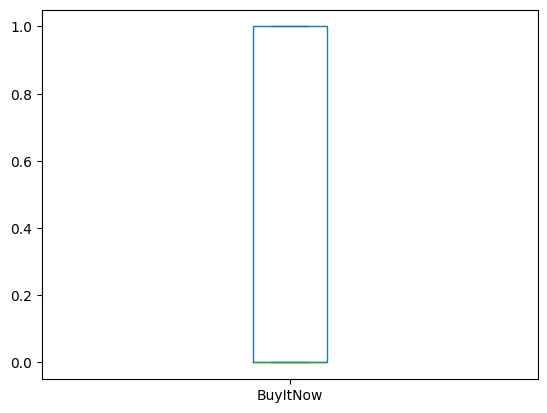

In [102]:
data['BuyItNow'].plot(kind = 'box')

<Axes: >

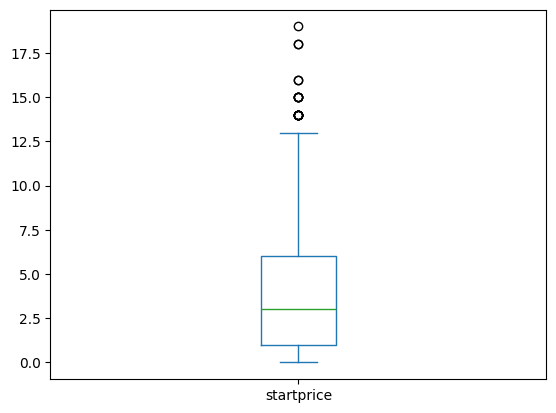

In [139]:
data['startprice'].plot(kind = 'box')

<Axes: >

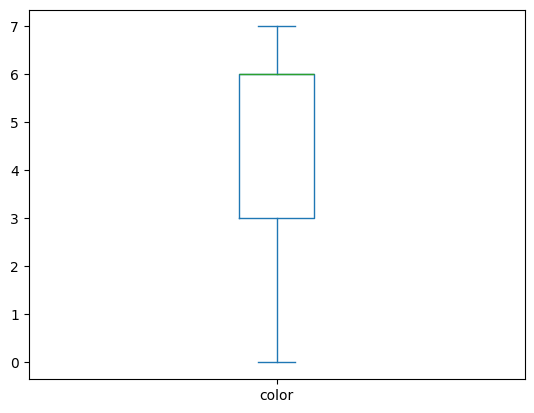

In [104]:
# 숫자가 아님
data['color'].plot(kind = 'box')

In [ ]:
data['productline'].plot(kind = 'box')

In [ ]:
data['noDescription'].plot(kind = 'box')

In [ ]:
data['charCountDescription'].plot(kind = 'box')

In [ ]:
data['upperCaseDescription'].plot(kind = 'box')

In [34]:
data['color']

0                White
1                  NaN
2                  NaN
3           Space Gray
4           Space Gray
             ...      
1480               NaN
1481    Midnight Black
1482        Space Gray
1483    Midnight Black
1484    Midnight Black
Name: color, Length: 1485, dtype: object

In [35]:
data['color'].unique()

array(['White', nan, 'Space Gray', 'Midnight Black', 'Aura Black', 'Gold',
       'Black', 'Prism Black'], dtype=object)

In [36]:
data['color'].nunique()

7

In [37]:
data['color'] = data['color'].fillna('Unknown')

In [38]:
data['color'].value_counts()

color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64

In [39]:
data

,BuyItNow,startprice,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,no description,100,2,0
3,1,175.00,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...
1480,0,89.50,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,Midnight Black,Galaxy_S7,no description,92,2,1


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   charCountDescription  1485 non-null   int64  
 6   upperCaseDescription  1485 non-null   int64  
 7   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 92.9+ KB


In [46]:
# noDescription 잘못됨 -> charCountDescription 이거랑 반대임
# 하지만 글자 수는 관계가 거의 없기 때문에 지우기
del data['charCountDescription']

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   upperCaseDescription  1485 non-null   int64  
 6   sold                  1485 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 81.3+ KB


In [48]:
data['upperCaseDescription']

0       0
1       0
2       2
3       0
4       0
       ..
1480    2
1481    5
1482    1
1483    2
1484    5
Name: upperCaseDescription, Length: 1485, dtype: int64

In [49]:
data['upperCaseDescription'].value_counts()

upperCaseDescription
0     890
2     131
1     126
4      77
3      71
5      41
6      21
10     17
7      15
8      13
15     11
12      8
9       6
11      5
14      4
16      4
26      3
80      3
76      3
20      2
41      2
74      2
22      2
13      2
78      2
69      2
81      2
19      2
18      2
24      1
54      1
44      1
33      1
66      1
30      1
77      1
73      1
25      1
53      1
70      1
34      1
37      1
58      1
32      1
17      1
Name: count, dtype: int64

In [ ]:
# upperCaseDescription : 몇 문장인지

In [50]:
def upperCaseDescription_num(x):
    if x == 0:
        return 0
    else:
        return 1

In [51]:
data['upperCaseDescription'] = data['upperCaseDescription'].apply(upperCaseDescription_num)

In [52]:
data['upperCaseDescription'].unique()

array([0, 1])

In [53]:
data['upperCaseDescription']

0       0
1       0
2       1
3       0
4       0
       ..
1480    1
1481    1
1482    1
1483    1
1484    1
Name: upperCaseDescription, Length: 1485, dtype: int64

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   color                 1485 non-null   object 
 3   productline           1485 non-null   object 
 4   noDescription         1485 non-null   object 
 5   upperCaseDescription  1485 non-null   int64  
 6   sold                  1485 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 81.3+ KB


BuyItNow : 바로 구매 할 수 있는지의 여부(즉시 구매)
startprice : 경매의 시작 가격
carrier : 통신사
color : 기기 색상
productline : 모델명
noDescription : 판매자가 설명을 썼는지 안썼는지
charCountDescriptio : 설명이 얼마나 긴지
upperCaseDescription : 몇 문장인지
sold : 팔렸는지 안팔렸는지 (우리가 알고자하는 종속변수)

In [58]:
data['noDescription'].isna().sum()

np.int64(0)

In [59]:
data['noDescription']

0       contains description
1       contains description
2             no description
3       contains description
4       contains description
                ...         
1480          no description
1481          no description
1482          no description
1483          no description
1484          no description
Name: noDescription, Length: 1485, dtype: object

In [60]:
def noDescription_num(x):
    if x == 'contains description':
        return 0;
    else:
        return 1;

In [61]:
data['noDescription'] = data['noDescription'].apply(noDescription_num)

In [62]:
data['noDescription']

0       0
1       0
2       1
3       0
4       0
       ..
1480    1
1481    1
1482    1
1483    1
1484    1
Name: noDescription, Length: 1485, dtype: int64

<Axes: xlabel='noDescription,sold'>

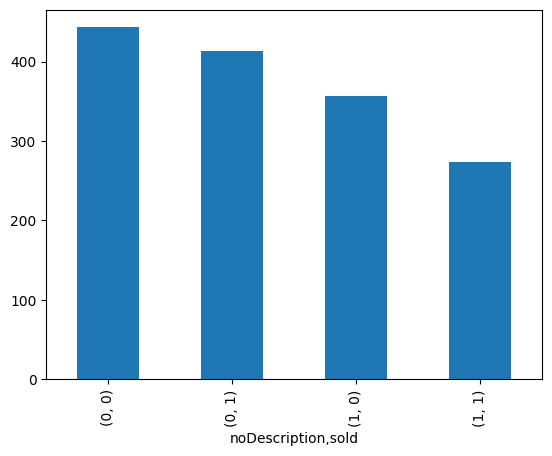

In [64]:
data[['sold', 'noDescription']].groupby('noDescription').value_counts(sort=False).plot(kind = 'bar')

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   BuyItNow              1485 non-null   int64   
 1   startprice            1485 non-null   object  
 2   color                 1485 non-null   int64   
 3   productline           1485 non-null   int64   
 4   noDescription         1485 non-null   int64   
 5   upperCaseDescription  1485 non-null   int64   
 6   sold                  1485 non-null   int64   
 7   startprice_binned     1485 non-null   category
dtypes: category(1), int64(6), object(1)
memory usage: 83.6+ KB


In [107]:
data['startprice'].value_counts()

startprice
0     252
1     208
3     173
4     153
5     147
2     143
6     112
7      84
8      58
9      42
10     35
11     31
12     18
13     10
14      9
15      5
16      2
18      2
19      1
Name: count, dtype: int64

In [111]:
data['startprice'] = pd.to_numeric(data['startprice'], errors='coerce')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   BuyItNow              1485 non-null   int64   
 1   startprice            1485 non-null   int64   
 2   color                 1485 non-null   int64   
 3   productline           1485 non-null   int64   
 4   noDescription         1485 non-null   int64   
 5   upperCaseDescription  1485 non-null   int64   
 6   sold                  1485 non-null   int64   
 7   startprice_binned     1485 non-null   category
dtypes: category(1), int64(7)
memory usage: 83.6 KB


In [116]:
data['startprice'].nunique()

19

# EDA 탐색적 데이터 분석

In [55]:
data1 = data.copy()
data2 = data.copy()
data3 = data.copy()
data4 = data.copy()
data5 = data.copy()

In [66]:
# 레이블 인코더 임포트하기
from sklearn.preprocessing import LabelEncoder
# 레이블 인코더 인스턴스 생성
le = LabelEncoder()
le2 = LabelEncoder()
le3 = LabelEncoder()

data1['color'] = le.fit_transform(data1['color'])
data2['productline'] = le2.fit_transform(data2['productline'])


print(data1['color'])
print(data2['productline'])

0       7
1       6
2       6
3       5
4       5
       ..
1480    6
1481    3
1482    5
1483    3
1484    3
Name: color, Length: 1485, dtype: int64
0       6
1       2
2       7
3       2
4       5
       ..
1480    4
1481    6
1482    0
1483    4
1484    4
Name: productline, Length: 1485, dtype: int64


In [69]:
# color
data1.head()

,BuyItNow,startprice,color,productline,noDescription,upperCaseDescription,sold
0,0,199.99,7,Galaxy_S9,contains description,0,1
1,0,235.00,6,Galaxy_Note9,contains description,0,0
2,0,199.99,6,Unknown,no description,1,0
3,1,175.00,5,Galaxy_Note9,contains description,0,1
4,1,100.00,5,Galaxy_S8,contains description,0,1


In [70]:
# productline
data2.head()

,BuyItNow,startprice,color,productline,noDescription,upperCaseDescription,sold
0,0,199.99,White,6,contains description,0,1
1,0,235.00,Unknown,2,contains description,0,0
2,0,199.99,Unknown,7,no description,1,0
3,1,175.00,Space Gray,2,contains description,0,1
4,1,100.00,Space Gray,5,contains description,0,1


In [71]:
data['color'] = data1['color']
data['productline'] = data2['productline']

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   BuyItNow              1485 non-null   int64   
 1   startprice            1485 non-null   int64   
 2   color                 1485 non-null   int64   
 3   productline           1485 non-null   int64   
 4   noDescription         1485 non-null   int64   
 5   upperCaseDescription  1485 non-null   int64   
 6   sold                  1485 non-null   int64   
 7   startprice_binned     1485 non-null   category
dtypes: category(1), int64(7)
memory usage: 83.6 KB


In [120]:
# del data['startprice_binned']

In [121]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   BuyItNow              1485 non-null   int64
 1   startprice            1485 non-null   int64
 2   color                 1485 non-null   int64
 3   productline           1485 non-null   int64
 4   noDescription         1485 non-null   int64
 5   upperCaseDescription  1485 non-null   int64
 6   sold                  1485 non-null   int64
dtypes: int64(7)
memory usage: 81.3 KB


In [122]:
data

,BuyItNow,startprice,color,productline,noDescription,upperCaseDescription,sold
0,0,3,7,6,0,0,1
1,0,4,6,2,0,0,0
2,0,3,6,7,1,1,0
3,1,3,5,2,0,0,1
4,1,2,5,5,0,0,1
...,...,...,...,...,...,...,...
1480,0,1,6,4,1,1,0
1481,0,4,3,6,1,1,1
1482,0,6,5,0,1,1,0
1483,0,1,3,4,1,1,1


# Feature Enginnering(변수 선택, 새로운 변수 생성)

In [123]:
X = data.drop('sold', axis = 1)
y = data['sold']

In [124]:
X

,BuyItNow,startprice,color,productline,noDescription,upperCaseDescription
0,0,3,7,6,0,0
1,0,4,6,2,0,0
2,0,3,6,7,1,1
3,1,3,5,2,0,0
4,1,2,5,5,0,0
...,...,...,...,...,...,...
1480,0,1,6,4,1,1
1481,0,4,3,6,1,1
1482,0,6,5,0,1,1
1483,0,1,3,4,1,1


In [126]:
y

0       1
1       0
2       0
3       1
4       1
       ..
1480    0
1481    1
1482    0
1483    1
1484    0
Name: sold, Length: 1485, dtype: int64

In [128]:
data['upperCaseDescription'].nunique()

2

# 데이터 분리 및 분석

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [131]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

0.7441077441077442
              precision    recall  f1-score   support

           0       0.72      0.80      0.75       147
           1       0.78      0.69      0.73       150

    accuracy                           0.74       297
   macro avg       0.75      0.74      0.74       297
weighted avg       0.75      0.74      0.74       297



# 성능 평가 및 성능 개선을 위한 튜닝

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

In [133]:
for i in range(1,20):
    dtc = DecisionTreeClassifier(max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7643097643097643
1               precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
2               precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.7609427609427609
3               precision    recall  f1-score   support

           0       0.70      0.89      0.79       147
           1       0.86      0.63      0.73       150

    accuracy                           0.76       297
   macro avg       0.78      0.76      0.76       297
weigh

5가 젤 괜찮음
0.8148148148148148

criterion : 분류 알고리즘 변경하면서 최적화

In [134]:
for i in range(1,20):
    dtc = DecisionTreeClassifier(criterion="entropy" ,max_depth = i, random_state = 8)
    dtc.fit(X_train, y_train)
    pred = dtc.predict(X_test)
    print(i, accuracy_score(y_test, pred))
    print(i, classification_report(y_test, pred))

1 0.7643097643097643
1               precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

2 0.7643097643097643
2               precision    recall  f1-score   support

           0       0.75      0.78      0.77       147
           1       0.77      0.75      0.76       150

    accuracy                           0.76       297
   macro avg       0.76      0.76      0.76       297
weighted avg       0.76      0.76      0.76       297

3 0.7609427609427609
3               precision    recall  f1-score   support

           0       0.70      0.89      0.79       147
           1       0.86      0.63      0.73       150

    accuracy                           0.76       297
   macro avg       0.78      0.76      0.76       297
weigh

In [136]:
dtc = DecisionTreeClassifier(criterion="log_loss" ,max_depth = 4, random_state = 8)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(i, accuracy_score(y_test, pred))
print(i, classification_report(y_test, pred))

19 0.797979797979798
19               precision    recall  f1-score   support

           0       0.77      0.84      0.81       147
           1       0.83      0.75      0.79       150

    accuracy                           0.80       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.80      0.80      0.80       297

